In [1]:
# Add libraries freely, if you need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 01. Linear Regression
- Dataset: car_dataset.csv
- Source: kaggle
- Target: Price
> You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1. Import Libraries and Dataset & 2. Data Analysis

#### (a) (5pt) car_dataset_revised.csv를 car_data 변수에 넣어 읽어오고, 데이터의 구조를 파악하여라. 또한, 해당 데이터에서의 numerical variable 과 가격 간의 각각의 상관관계를 시각화하고 경향성을 파악하여라

In [2]:
# 참고.
cateorical_vars = ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber']
numerical_vars = ['wheelbase','carlength', 'carwidth','curbweight','enginesize','boreratio', 'horsepower','fueleconomy']
car_data = pd.read_csv("C:/Users/LEGION/AI_programming/Assignment2/car_dataset.csv")
car_data

,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,23,28,16845.0
201,volvo,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19,25,19045.0
202,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,18,23,21485.0
203,volvo,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,26,27,22470.0


In [3]:
print(car_data.info())
#데이터를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형을 확인 할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CompanyName     205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  enginesize      205 non-null    int64  
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
 17  price           205 non-null    flo

In [4]:
#데이터의 숫자형 특성을 확인 할 수 있다.
car_data.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,45400.000000


##### Deriving new features - "fueleconomy"  & "carsrange"

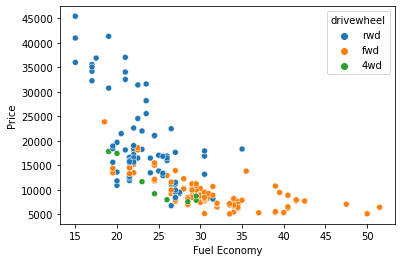

In [5]:
car_data['fueleconomy'] = (0.5*car_data['citympg']) + (0.5*car_data['highwaympg'])

plt.figure(figsize=(6,4))

sns.scatterplot(car_data['fueleconomy'],car_data['price'],hue=car_data['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

# 'fueleconomy' has an obvious negative correlation with price and is significant.

In [6]:
df1 = car_data[numerical_vars] #numerical_vars 에 해당하는 column의 정보들만 df1이라는 데이터프레임에 새로 저장하였다.
df1['price']= car_data['price'] #새로운 price 열에 car_data의 price 열의 정보를 불러온 뒤 추가하였다.
df1_corr = df1.corr() #df1_corr 은 df1의 correlation 을 나타내는 데이터 프레임이다.
df1_corr

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,-0.511871,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,-0.693200,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,-0.665184,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,-0.783584,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,-0.670689,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,-0.590044,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,-0.791291,0.808139
fueleconomy,-0.511871,-0.693200,-0.665184,-0.783584,-0.670689,-0.590044,-0.791291,1.000000,-0.696835
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,-0.696835,1.000000


<AxesSubplot:>

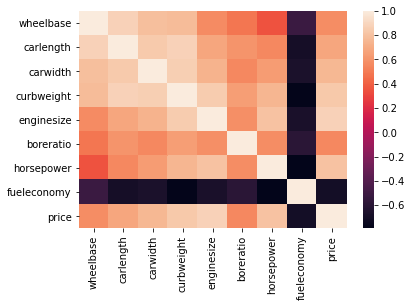

In [7]:
sns.heatmap(df1_corr) #df1_corr을 heatmap을 통해 상관관계를 분석하면 아래와 같다.

In [8]:
df1_corr = df1_corr.drop(['price'])
df1_corr.index

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'fueleconomy'],
      dtype='object')

numerical variable과 price의 상관관계를 시각화하면 다음과 같다. fueleconomy를 제외한 numerical vars의 특성들은 모두 price 와 positive correlation 관계를 보이고 있다. fueleconomy의 경우만 price와 negative correlation 관계를 보이고 있다. 즉, positive correlation 변수들은 price와 정비례의 관계이고 negative correlation 변수들은 반비례의 관계임을 의미한다.

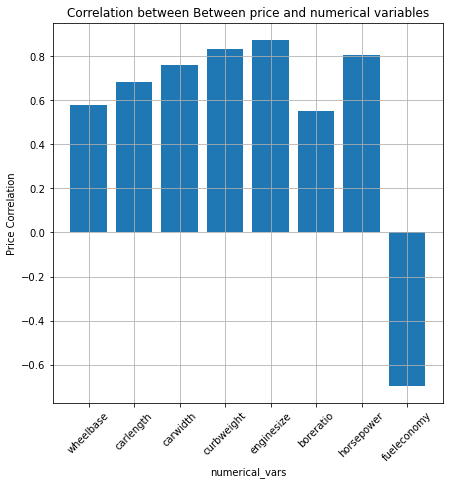

In [9]:
plt.figure(figsize=(7,7))
plt.bar(df1_corr.index, df1_corr['price'])
plt.title("Correlation between Between price and numerical variables",fontsize=12)
plt.xlabel("numerical_vars")
plt.ylabel("Price Correlation")
plt.xticks(rotation=45)
plt.grid()

### 3. Data Pre-Processing

#### (b) (5pt) one-hot encoding이 필요한 변수를 처리하여 final_data 변수에 저장하고, 이 과정이 왜 필요한지 (주석 달고) 설명하여라 (자신이 찾아본 url 을 같이 첨부하여도 됨).


One-hot Encoding 이란?

One-hot Encoding은 Machine learning 학습시킬때 알고리즘이 쉽게 data를 파악할 수 있도록 binary variable 로 변환해주는 것이다. 즉,  텍스트 형태의 범주화 데이터를 숫자 테이터로 바꿔주는 것이다.  One-hot encoding은 1 or 0의 값으로 표현되는데, 이때 값이 1이면 해당 범주에 속하는 것이고, 0이면 속하지 않는 것을 의미한다.

pd.get_dummies 함수를 사용하여 One-hot encoding을 구현할 수 있다. 이 함수는 가변수(dummy variable)로 만들어 주는것인데, 이는 0과 1로만 이루어진 열을 생성한다.

In [10]:
final_data = pd.get_dummies(car_data)

### 4. Train-Test Split

##### Trainset 과 Testset을 7:3의 비율로 나누었다. 

In [11]:
from sklearn.model_selection import train_test_split

X = final_data.drop(['price'], axis=1)
y = final_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(143, 60) (62, 60) (143,) (62,)


### 5. Model Training

#### (c) (10pt) scikit learn의 LinearRegression module을 사용하여 훈련 데이터를 통해 학습하고, 테스트 데이터를 통해 예측하여라. 그리고 MSE와 R-square 값을 계산하여라.

아래의 그래프는 train_set으로 모델을 학습 시킨 후 testset을 통해 예측한 결과를 나타낸 것이다. 

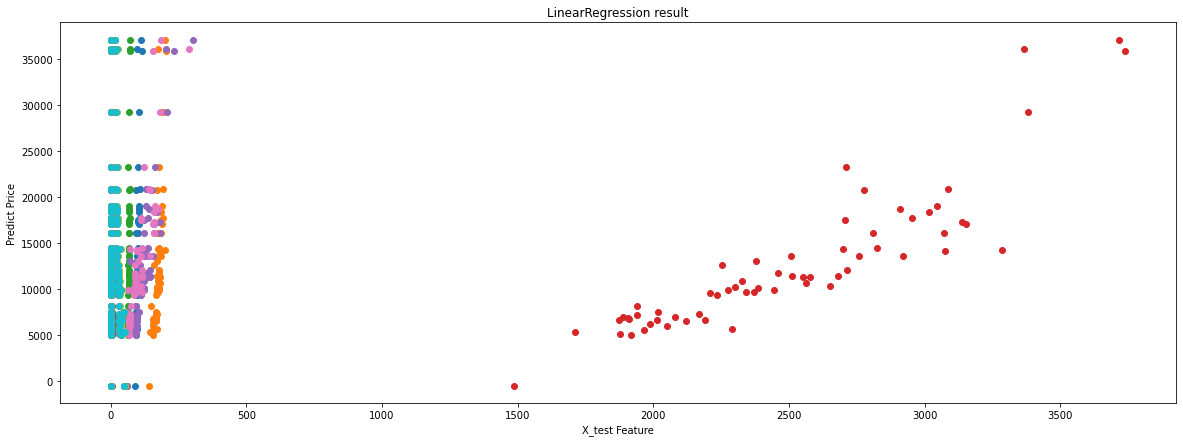

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(20,7))
plt.title("LinearRegression result",fontsize=12)
plt.xlabel("X_test Feature")
plt.ylabel("Predict Price")
plt.plot(X_test,y_pred,'o')
plt.show()

아래의 그림은 enginesize에 대한 예측결과만 확인 한 것이다. 앞서 price와 enginesize는 positive correlation을 보였고, LinearRegression을 통한 예측에서도 동일하게 positive 한 관계를 보이고 있음을 확인 할 수 있다.

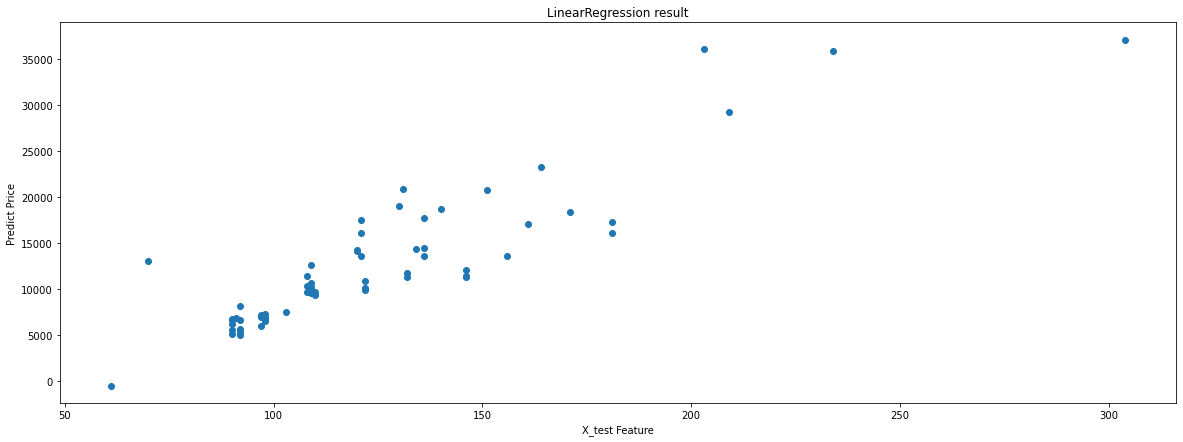

In [13]:
plt.figure(figsize=(20,7))
plt.title("LinearRegression result",fontsize=12)
plt.xlabel("X_test Feature")
plt.ylabel("Predict Price")
plt.plot(X_test['enginesize'],y_pred,'o')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE(mean squared error) : 실제 값과 예측 값의 차이를 제곱해 평균화한 값이다.

R-squred (결정 계수) : R-squred는 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표이다. 예를 들어 R-squred 값이 0.3이면 독립변수가 종속변수의 30% 정도를 설명한다고 말한다.

In [15]:
mean_squared_error(y_test,y_pred)

6761916.762425419

In [16]:
r2_score(y_test, y_pred)

0.89760469394395

# 02. Logistic Regression

- Dataset: fordA_train.csv, fordA_test.csv
- Source: http://www.timeseriesclassification.com/description.php?Dataset=FordA
- Target: Label (normal:1, abnormal:-1)
> This data was originally used in a competition in the IEEE World Congress on Computational Intelligence, 2008. The classification problem is to diagnose whether a certain symptom exists or does not exist in an automotive subsystem. Each case consists of 500 measurements of engine noise and a classification. There are two separate problems: For FordA the Train and test data set were collected in typical operating conditions, with minimal noise contamination.
- Notice: Do not download the file directly from the above-mentioned site. The provided file is a modified version of the original data.

### 1. Import Libraries and Dataset

In [17]:
# load dataset
train_df = pd.read_csv('C:/Users\LEGION/AI_programming/Assignment2/fordA_train.csv')
test_df = pd.read_csv('C:/Users/LEGION/AI_programming/Assignment2/fordA_test.csv')

print(train_df.shape, test_df.shape)

(3601, 501) (1320, 501)


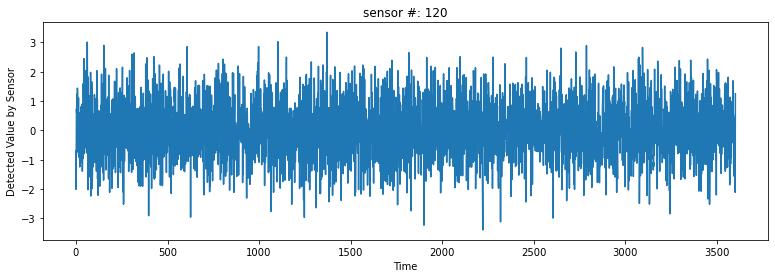

In [18]:
import random
random_number = random.randint(0,500)
plt.figure(figsize=(13,4))
plt.plot(train_df.iloc[:,random_number])
plt.xlabel('Time')
plt.ylabel('Detected Value by Sensor')
plt.title('sensor #: {}'.format(random_number))
plt.show()

#### (a)
#### (a-1) train과 test 데이터 셋으로부터 설명 변수와 종속 변수를 구분하여 저장하라 (X_train, y_train, X_test, y_test)

In [19]:
# X_train <- train_df 에서 맨 마지막 열만 제외
X_train = train_df.drop(train_df.columns[-1],axis=1)

# y_train <- train_df 에서의 맨 마지막 열
y_train = train_df.iloc[:,-1]

#X_test <- test_df에서 맨 마지막 열만 제외
X_test = test_df.drop(test_df.columns[-1],axis=1)

#y_test <- test_df 에서의 맨 마지막 열
y_test = test_df.iloc[:,-1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3601, 500) (3601,) (1320, 500) (1320,)


#### (a-2) 훈련과 테스트 데이터 내에 정상/비정상 집단의 비율을 시각화 하여 확인하여라

Text(0, 0.5, 'count')

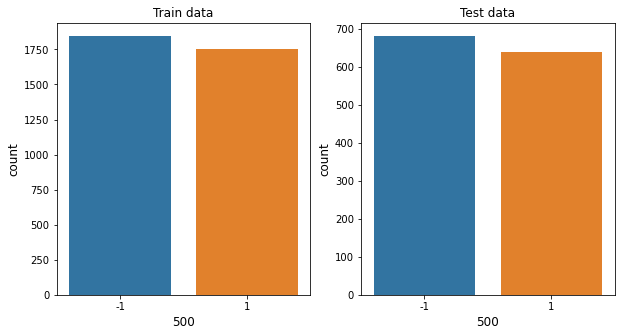

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
sns.countplot(data = train_df, x = train_df['500'],ax=ax1)
ax1.set_title("Train data",fontsize=12)
ax1.set_xlabel("500",fontsize=12)
ax1.set_ylabel("count",fontsize=12)
sns.countplot(data = test_df, x = test_df['500'],ax=ax2)
ax2.set_title("Test data",fontsize=12)
ax2.set_xlabel("500",fontsize=12)
ax2.set_ylabel("count",fontsize=12)

### 2. Data Analysis

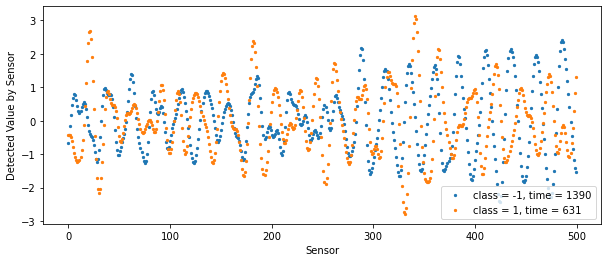

In [21]:
labels = np.array([-1,1])

plt.figure(figsize=(10,4))

for c in labels:
    df = X_train[y_train == c].reset_index(drop=True)
    time_t = random.randint(0, df.shape[0])
    plt.scatter(range(0,500), df.iloc[time_t],label='class = ' + str(int(c)) + ', time = ' + str(time_t), s=5)

plt.legend(loc='lower right')
plt.xlabel('Sensor')
plt.ylabel('Detected Value by Sensor')
plt.show()

### 3. Data Preprocessing

In [22]:
# Outliers can often occur in process data, which requires robust normalization.

from sklearn.preprocessing import RobustScaler

rbscale = RobustScaler()
X_train = rbscale.fit_transform(X_train)
X_test = rbscale.transform(X_test)

### 4. Model Training

Logistic Regression은 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는 데 사용되는 통계 기법이다.  즉, 분류 기법이다.

Sigmoid 함수를 사용하여 분류를 하게 되는데 이때, x축의 threshold 값을 기준으로 threshold 값보다 클 경우 1, 작을 경우 거의 0의 값을 가지게 된다. 

아래 그래프를 통해 LogisticRegression 모델 적용 결과를 확인해 보면 x=0 을 기준으로 정확한 분류가 되지 않았음을 확인 할 수 있다.

#### (b) TO DO

In [23]:
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(solver='liblinear', random_state=0)

base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

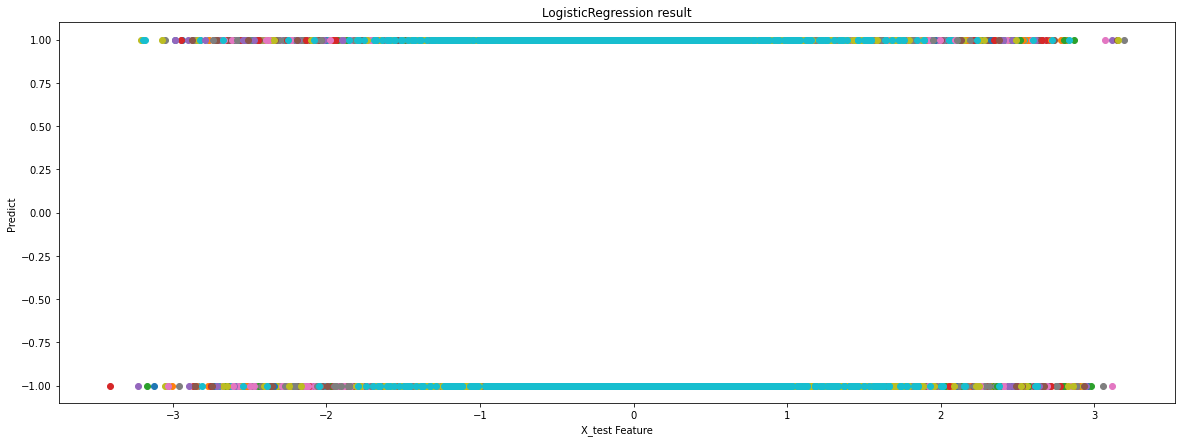

In [24]:
plt.figure(figsize=(20,7))
plt.title("LogisticRegression result",fontsize=12)
plt.xlabel("X_test Feature")
plt.ylabel("Predict")
plt.plot(X_test,y_pred,'o')
plt.show()

### 5. Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(data=cm,
                      index=['Actual -1', 'Actual +1'],
                      columns=['Predict -1', 'Predict +1'])
    
    # plotting the confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### (c-1) TO DO

True Positive(TP) : 실제 True인 정답을 True 라고  예측 (정답)

False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)

False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)

Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)



정밀도(Precision) : 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율

재현률(Recall) : 실제 True 인 것 중에 모델이 True 라고 예측한 비율

정확도(Accuracy) : 전체 데이터 중 올바르게 예측한(TP+ TN) 비율

F1 Score  : 정밀도와 재현율의 조화 평균

In [27]:
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f1score = 2 * (precision*recall)/(precision+recall)
    
    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('f1_score = ', f1score)

#### (c-2) TO DO

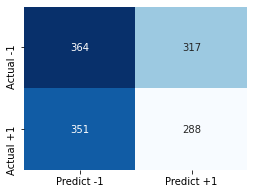

In [28]:
conf_matrix(y_test, y_pred)

In [29]:
model_evaluation(y_test, y_pred)

accuracy =  0.49393939393939396
precision =  0.509090909090909
recall =  0.5345080763582967
f1_score =  0.5214899713467049


모델의 Accuracy, precision, recall, F1_score 모두 50%이하의 수치를 보이고 있다. 즉, 실제 데이터를 약 50%이상의 데이터는 제대로 예측하지 못하는 것을 의미한다. 따라서, Logistic Regression으로 학습한 모델의 성능은 좋지 않다고 평가된다. 

In [30]:
import scikitplot as skplt

#### (c-3) # TO DO

In [31]:
y_probas = base_model.predict_proba(X_test)

아래 그래프는 scikitplot 을 통해 ROC Curve를 나타낸 것이다. area = 0.49인 것을 확인하였다.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

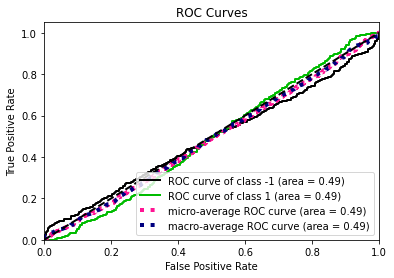

In [32]:
skplt.metrics.plot_roc(y_test, y_probas)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('accuracy = ',accuracy_score(y_test, y_pred))
print('precision = ',precision_score(y_test, y_pred))
print('recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))

accuracy =  0.49393939393939396
precision =  0.47603305785123967
recall =  0.4507042253521127
f1_score =  0.4630225080385852


# 03. Support Vector Machine
- Dataset: breast_cancer_dataset.csv
- Source: UCI Machine Learning repository
- Target: Diagnosis (M=malignant, B=benign)
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
- For more information, check this website: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### 1. Import Libraries and Dataset

In [34]:
# load the dataset
data = pd.read_csv("C:/Users/LEGION/AI_programming/Assignment2/breast_cancer_dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
data.shape

(569, 33)

In [37]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### 2. Data Preprocessing

In [38]:
data['diagnosis'] = pd.get_dummies(data['diagnosis'], drop_first=True)
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [39]:
X = data.drop(['id','Unnamed: 32','diagnosis'], axis=1) # axis = 1 -> 열 drop , axis = 0 -> 행 drop
y = data['diagnosis']

<AxesSubplot:>

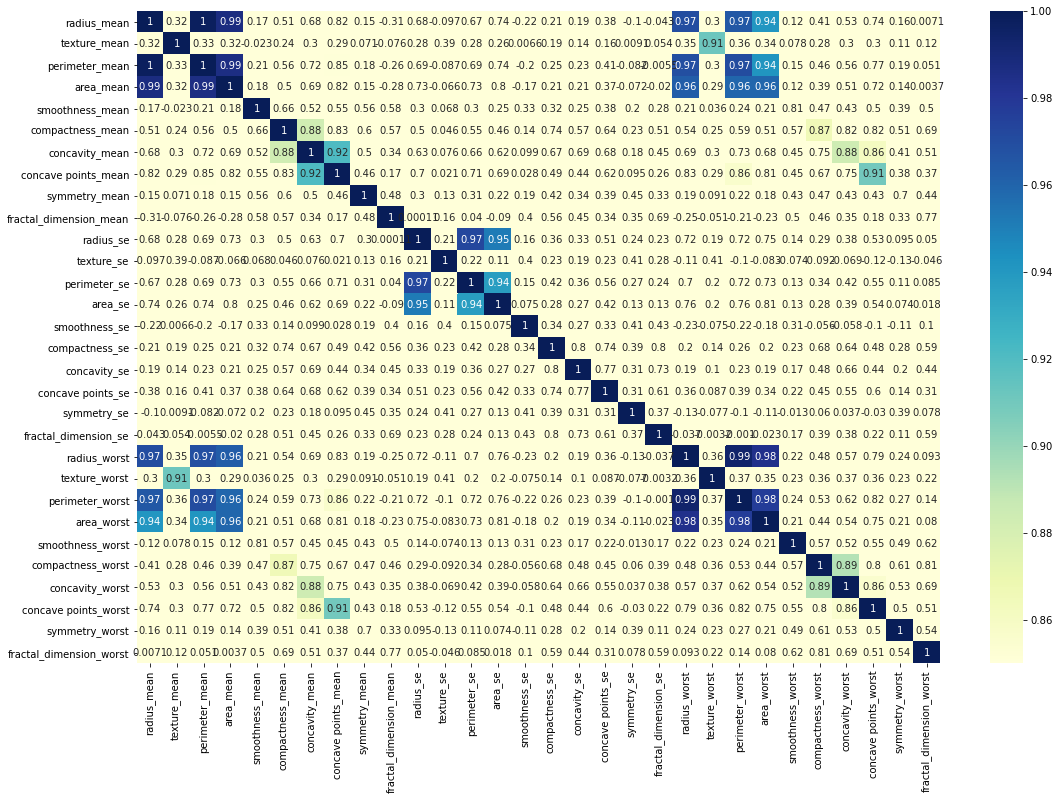

In [40]:
# check correlation between the variables
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), vmin=0.85, vmax=1, annot=True, cmap='YlGnBu')

### 3. Train-Test Split

#### (a)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
# train test 데이터 split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
# define evaluation function
from sklearn.metrics import confusion_matrix, accuracy_score

def print_model_score(actual, pred):
    print(confusion_matrix(actual, pred))
    print('accuracy: %.3f' % accuracy_score(actual, pred))

### 4. Model Training

#### (b)

In [44]:
from sklearn.svm import LinearSVC
linear_model = LinearSVC(loss='hinge', random_state=0)

In [45]:
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
print_model_score(y_test,y_pred)

[[92 16]
 [ 3 60]]
accuracy: 0.889


#### (c)

데이터 전처리 과정에서 데이터 특성별로 스케일이 다르면 올바른 학습하기 어렵다. 따라서 데이터 스케일링 작업을 통해서 모든 특성의 범위 (또는 분포)를 같게 만들어 주어야 한다.

Standardization (표준화) : 특성들의 평균을 0, 분산을 1 로 스케일링. 즉, 특성들을 정규분포화 하는것이다.

Normalization (정규화) : 특성들을 특정 범위(주로 [0,1]) 로 스케일링. 가장 작은 값은 0, 가장 큰 값은 1 로 변환되므로, 모든 특성들은 [0, 1] 범위를 갖게된다.

StandardScaler() : 특성들의 평균을 0, 분산을 1 로 스케일링.

MinMaxScaler()   : 특성들을 특정 범위(주로 [0,1]) 로 스케일링.

MaxAbsScaler()   : 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링.즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 동일.

RobustScaler()   : 평균과 분산 대신에 중간 값과 사분위 값을 사용.중간 값은 정렬시 중간에 있는 값을 의미하고 사분위값은 1/4, 3/4에 위치한 값을 의미.


Normalizer()     : 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용.

[참고 링크](https://wooono.tistory.com/96) 

In [46]:
from sklearn.preprocessing import StandardScaler

#### (c-1) TO DO

전체 X 데이터에 대한 scaling을 진행한 후에 scaled 된 데이터를 train 과 test set으로 구분하도록 하였다.

In [47]:
standardScaler = StandardScaler()
X_scale = standardScaler.fit_transform(X)

#### (c-2) TO DO

In [48]:
x_scale_train,x_scale_test,y_scale_train,y_scale_test=train_test_split(X_scale, y, test_size=0.3, random_state=0)

In [49]:
linear_model.fit(x_scale_train, y_scale_train)
y_scale_pred = linear_model.predict(x_scale_test)
print_model_score(y_scale_test,y_scale_pred)

[[103   5]
 [  2  61]]
accuracy: 0.959


Standardscaler 를 사용하기 전의 accuracy는 0.889 였지만, scaling 한 후의 accuracy는 0.959로 증가하였다. 즉, scale을 통해 데이터 특성의 범위 및 분포를 같게하여 좀 더 정확한 모델링 결과를 도출할 수 있었다.

#### (d)

Scikit-learn의 많은 분류 모델들은 predict, predict_proba 함수를 제공한다. SVC는 모델 생성시 특정 옵션을 주어야 predict_proba가 사용 가능하다. 하지만 LinearSVC의 경우는 predict_proba 함수를 제공하지 않는다. 

AUC-ROC를 계산하기 위해서는 각 클래스(class, label, output)에 대한 확률값(probability)이 필요하고 predict_proba를 통해 확률값을 얻을 수 있다. 하지만, predict 함수는 확률값 대신에 예측된 클래스 값을 반환하기 때문에 AUC-ROC 계산에 사용할 수 없다.

따라서 LinearSVC을 사용할 경우 각 클래스에 대한 확률값을 직접 구현해야 한다.

In [50]:
y_pred =linear_model.decision_function(x_scale_test)
prob = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr):

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1],[0,1],'k--')

    plt.xlabel('FPR (1-specificity)')
    plt.ylabel('TPR (sensitivity)')
    plt.title('ROC curve')
    plt.show()

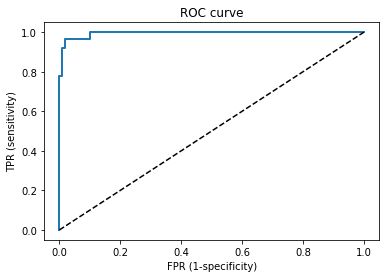

In [52]:
fper, tper, thresholds =roc_curve(y_scale_test,prob)
plot_roc_curve(fper, tper)

In [53]:
roc_auc_score(y_scale_test, prob)

0.9945620223398001

#### - LinearSVC 대신 SVC 모델을 사용해서 ROC Curve 와 AUC를 아래와 같이 구할수 있다.

In [54]:
from sklearn.svm import SVC

In [55]:
standardScaler = StandardScaler()
X_scale = standardScaler.fit_transform(X)

In [56]:
x_scale_train,x_scale_test,y_scale_train,y_scale_test=train_test_split(X_scale, y, test_size=0.3, random_state=0)

In [57]:
linear_model = SVC(kernel='linear', C=1.0, random_state=0,probability=True)
linear_model.fit(x_scale_train, y_scale_train)
prob = linear_model.predict_proba(x_scale_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_scale_test, prob)

In [58]:
y_svm_probas = linear_model.predict_proba(x_scale_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

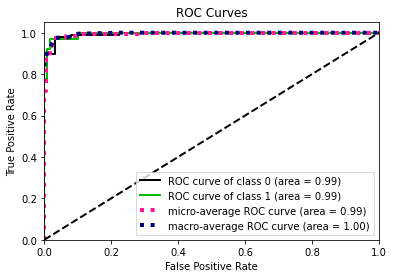

In [59]:
skplt.metrics.plot_roc(y_scale_test, y_svm_probas)

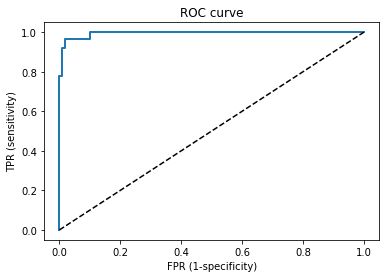

In [60]:
plot_roc_curve(fper, tper)

In [61]:
roc_auc_score(y_scale_test, prob)

0.9945620223398001

# 04. Decision Tree & Ensemble Learning

- Dataset: fordA_train.csv, fordA_test.csv
- Target: Label (normal:1, abnormal:-1)
- Notice: Same dataset used for Logistic Regression.

In [62]:
# load dataset

train_df = pd.read_csv('C:/Users/LEGION/AI_programming/Assignment2/fordA_train.csv') # 경로 알아서 바꿀것
test_df = pd.read_csv('C:/Users/LEGION/AI_programming/Assignment2/fordA_test.csv') # 경로 알아서 바꿀것

print(train_df.shape, test_df.shape)

(3601, 501) (1320, 501)


In [63]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1


In [64]:
# X_train <- train_df 에서 맨 마지막 열만 제외
X_train = train_df.drop(train_df.columns[-1],axis=1)

# y_train <- train_df 에서의 맨 마지막 열
y_train = train_df.iloc[:,-1]

#X_test <- test_df에서 맨 마지막 열만 제외
X_test = test_df.drop(test_df.columns[-1],axis=1)

#y_test <- test_df 에서의 맨 마지막 열
y_test = test_df.iloc[:,-1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # 주석 해제하고 실행

(3601, 500) (3601,) (1320, 500) (1320,)


In [65]:
# Outliers can often occur in process data, which requires robust normalization.
from sklearn.preprocessing import RobustScaler

rbscale = RobustScaler()
X_train = rbscale.fit_transform(X_train)
X_test = rbscale.transform(X_test)

### Funtions used for Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(data=cm,
                      index=['Actual -1', 'Actual +1'],
                      columns=['Predict -1', 'Predict +1'])
    
    # plotting the confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [67]:
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[1][0]
    FN = cm[0][1]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f1score = 2 * (precision*recall)/(precision+recall)
    
    print('accuracy = ', accuracy)
    print('precision = ', precision)
    print('recall = ', recall)
    print('f1_score = ', f1score)

### Model Training

__Decision Tree__

In [68]:
from sklearn.tree import DecisionTreeClassifier

#### (a)

accuracy =  0.5363636363636364
precision =  0.5369774919614148
recall =  0.73568281938326
f1_score =  0.620817843866171


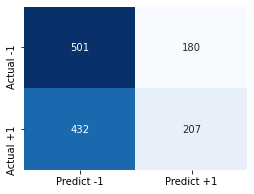

In [69]:
# decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
# 1. Model Selection
tree_model = DecisionTreeClassifier(max_depth=3)
# 2. Model Training
tree_model.fit(X_train,y_train)
# 3. Model Testing
y_pred = tree_model.predict(X_test)
# 4. Model evaluation
conf_matrix(y_test, y_pred)
model_evaluation(y_test,y_pred)

accuracy =  0.5863636363636363
precision =  0.6021180030257186
recall =  0.5844346549192364
f1_score =  0.593144560357675


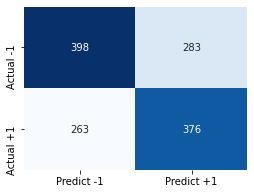

In [70]:
# decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 10
# 1. Model Selection
tree_model = DecisionTreeClassifier(max_depth=10)
# 2. Model Training
tree_model.fit(X_train,y_train)
# 3. Model Testing
y_pred = tree_model.predict(X_test)
# 4. Model evaluation
conf_matrix(y_test, y_pred)
model_evaluation(y_test,y_pred)

accuracy =  0.5598484848484848
precision =  0.5737463126843658
recall =  0.5712187958883994
f1_score =  0.5724797645327446


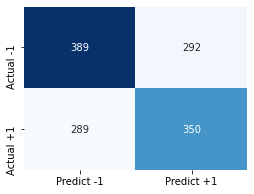

In [71]:
# decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 20
# 1. Model Selection
tree_model = DecisionTreeClassifier(max_depth=20)
# 2. Model Training
tree_model.fit(X_train,y_train)
# 3. Model Testing
y_pred = tree_model.predict(X_test)
# 4. Model evaluation
conf_matrix(y_test, y_pred)
model_evaluation(y_test,y_pred)

DecisionTress의 depth를 증가시켜가며 평가지표를 비교하였을 때, depth = 10일 때 accuracy는 0.57을 보였다. depth를 20으로 증가시켰지만 대부분의 성능지표가 감소하였다. 

__Bagging__

#### (b)

In [72]:
from sklearn.ensemble import BaggingClassifier

# 1. Model Selection
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                            n_estimators=10, # 10개의 tree
                            random_state=0,
                            verbose=1) # 학습 과정 표시

# 2. Model Training
bagging.fit(X_train, y_train)  
# 3. Model Testing
y_pred = bagging.predict(X_test) 
# 4. Model evaluation
model_evaluation(y_test,y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy =  0.6424242424242425
precision =  0.6205305651672434
recall =  0.7900146842878121
f1_score =  0.6950904392764857


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [73]:
# 1. Model Selection
bagging = BaggingClassifier(base_estimator = DecisionTreeClassifier(),
                            n_estimators=20, # 10개의 tree
                            random_state=0,
                            verbose=1) # 학습 과정 표시

# 2. Model Training
bagging.fit(X_train, y_train)  
# 3. Model Testing
y_pred = bagging.predict(X_test) 
# 4. Model evaluation
model_evaluation(y_test,y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy =  0.6772727272727272
precision =  0.6549210206561361
recall =  0.7914831130690162
f1_score =  0.7167553191489361


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


n_estimator를 10에서 20으로 증가시켜 실행하였을 때, 시간은 더 오래 걸리지만 그만큼 정확도가 증가함을 확인 할 수 있다.

__Random Forest__

#### (c)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# 1. Model Selection
rf = RandomForestClassifier(max_depth=5,n_estimators=100, oob_score=True, random_state=123456)
# 2. Model Training
rf.fit(X_train, y_train)
# 3. Model Testing
y_pred = rf.predict(X_test)
# 4. Model evaluation
model_evaluation(y_test,y_pred)

accuracy =  0.6772727272727272
precision =  0.6560587515299877
recall =  0.7870778267254038
f1_score =  0.7156208277703605


In [76]:
rf = RandomForestClassifier(max_depth=7, n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_evaluation(y_test,y_pred)

accuracy =  0.7166666666666667
precision =  0.6990920881971465
recall =  0.7914831130690162
f1_score =  0.7424242424242425


In [77]:
rf = RandomForestClassifier(max_depth=20, n_estimators=300, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
model_evaluation(y_test,y_pred)

accuracy =  0.7704545454545455
precision =  0.7661971830985915
recall =  0.7988252569750367
f1_score =  0.7821710999281093


__Boosting__

#### (d)

XGBoost는 Regression, Classification 문제를 모두 지원하며, 이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리이다.

GBM 대비 빠른 수행시간과 병렬 처리로 학습, 분류 속도가 빠르다.

CART(Classification and regression tree) 앙상블 모델을 사용하여 분류와 회귀영역에서 뛰어난 예측 성능 발휘한다.

앞서 실행한 DecisionTree, Bagging, RandomForest에 비해 높은 정확도로 좋은 성능을 보이고 있다.

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2880, 500) (721, 500) (2880,) (721,)


In [79]:
!pip install xgboost

In [80]:
import xgboost as xgb
# 1. Model Selection
xgb_model = xgb.XGBClassifier(max_depth=10,
                              learning_rate=0.1,
                              n_estimators=100,
                              objective='binary:logistic')
# 2. Model Training
xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_val, y_val)],
              eval_metric=['auc'],
              verbose=False
              )

# 3. Model Testing
y_pred = xgb_model.predict(X_test)
# 4. Model evaluation
model_evaluation(y_test,y_pred)

accuracy =  0.7681818181818182
precision =  0.7705627705627706
recall =  0.7841409691629956
f1_score =  0.777292576419214


In [81]:
# 1. Model Selection
xgb_model = xgb.XGBClassifier(max_depth=20,
                              learning_rate=0.1,
                              n_estimators=100,
                              objective='binary:logistic')
# 2. Model Training
xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_val, y_val)],
              eval_metric=['auc'],
              verbose=False
              )
# 3. Model Testing
y_pred = xgb_model.predict(X_test)
# 4. Model evaluation
model_evaluation(y_test,y_pred)

accuracy =  0.7742424242424243
precision =  0.7763347763347763
recall =  0.7900146842878121
f1_score =  0.7831149927219796


# 05. Clustering
- Dataset: wine_clustering.csv
- Source: UCI Machine Learning repository
- Target: 
- For more information, check this website: https://archive.ics.uci.edu/ml/datasets/wine
>These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
- Others
https://www.kaggle.com/questions-and-answers/122539

In [82]:
wine_data = pd.read_csv("C:/Users/LEGION/AI_programming/Assignment2/wine_clustering.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [83]:
wine_data.shape

(178, 13)

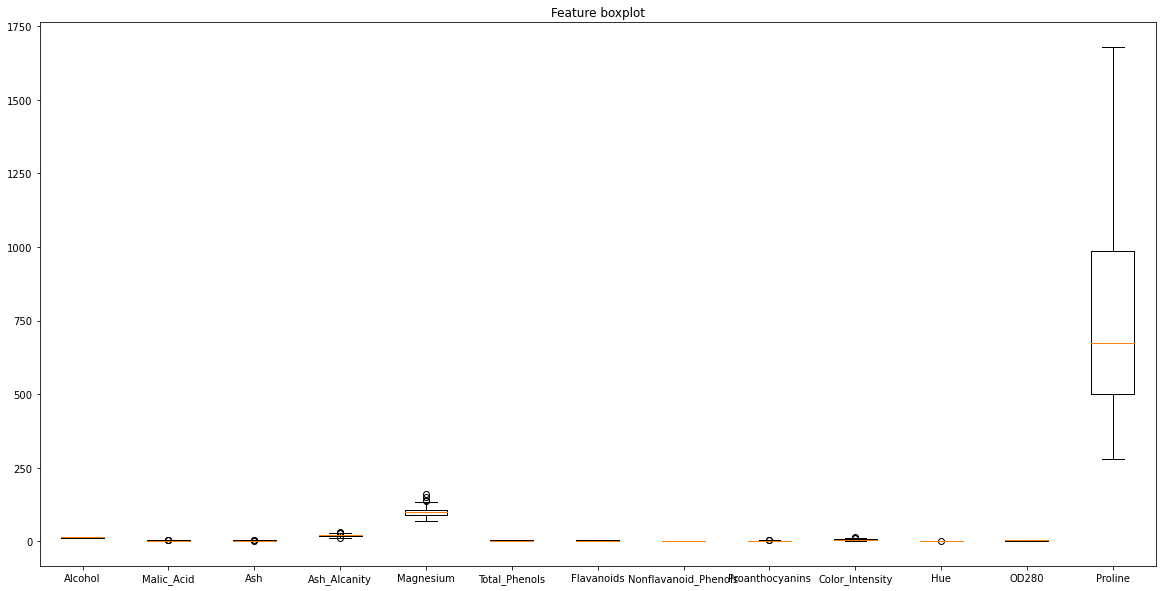

In [84]:
plt.figure(figsize=(20,10))
plt.boxplot(wine_data.values, labels=wine_data.columns)
plt.title('Feature boxplot')
plt.show()

### data normalizaiton

In [85]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(wine_data)

### visualization using PCA

In [86]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)

In [87]:
pca_data.shape

(178, 2)

#### (a)

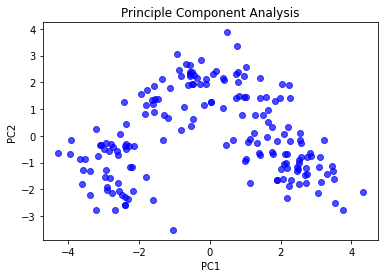

In [88]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], color = 'blue', alpha = 0.7)
plt.title('Principle Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Clustering

#### (b)
#### (b-1) TO DO

In [89]:
# example_code: K means clustering, define k as '2'

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit_predict(scaled_data)
pd.Series(kmeans_model).value_counts()

0    65
1    62
2    51
dtype: int64

Text(0, 0.5, 'within cluster sum of square')

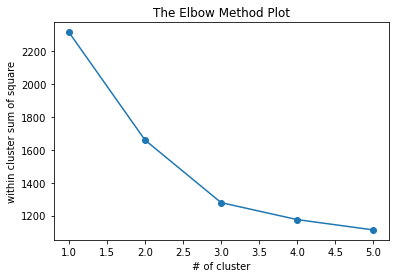

In [90]:
within_cluster_ss = []
for i in range(1, 5+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_data)
    ss = kmeans.inertia_
    within_cluster_ss.append(ss)
    
cluster_num = range(1, 5+1)
plt.plot(cluster_num, within_cluster_ss, marker='o')
plt.title('The Elbow Method Plot')
plt.xlabel('# of cluster')
plt.ylabel('within cluster sum of square')

In [91]:
within_cluster_ss

[2313.9999999999986,
 1659.0079672511504,
 1278.7607763668154,
 1175.7051928197127,
 1113.0208821682086]

Inertia value 라는 값을 보면 적정 클러스터 수를 선택할 수 있는 힌트를 얻을 수 있는데, Inertia value는 군집화가된 후에, 각 중심점에서 군집의 데이타간의 거리를 합산한것이으로 군집의 응집도를 나타내는 값이다. 코드상의 within_cluster_ss가 Inertia value 를 나타낸다. 이 값이 작을 수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다. cluster의 갯수가 1~3까지 Inertia value가 급격히 감소하다가 3이상부터는 크게 변화지 않는다. 따라서 급격히 변하는 구간인 cluster가 3인 곳이 clustering에 가장 적합한 수라고 판단하여 사용하였다.


#### (b-2) TO DO


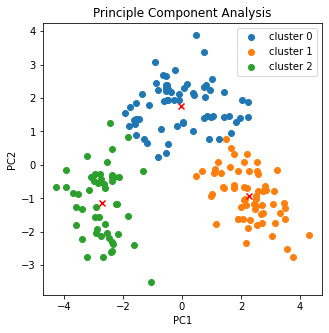

(178, 2)

In [92]:
# Hint
# 1. 바로 위의 코드를 참고하여 구현
# 2. centroid를 얻기 위해 centroid = kmeans.cluster_centers_ 실행
# 3. centroid의 principal component 를 얻기 위해 centroid_pca = pca.transform(centroid) 실행
# 4. 'pca_data'와 'centroid_pca'를 활용해 scatter plot 을 visualizaiton

k = 3
# 그룹 수, random_state 설정
kmeans = KMeans(n_clusters = k, random_state = 3)
kmeans_model = kmeans.fit_predict(scaled_data)
pd.Series(kmeans_model).value_counts()
kmeans_model
df_scale = pd.DataFrame(pca_data)
df_scale['cluster'] = kmeans_model

centroid = kmeans.cluster_centers_ 
centroid_pca = pca.transform(centroid)

plt.figure(figsize = (5, 5))
for i in range(k):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i].iloc[:,0], df_scale.loc[df_scale['cluster'] == i].iloc[:,1], 
                label = 'cluster ' + str(i))
    
plt.scatter(centroid_pca[:,0], centroid_pca[:,1], marker='x', c='red')
plt.legend()
plt.title('Principle Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
pca_data.shape

No handles with labels found to put in legend.


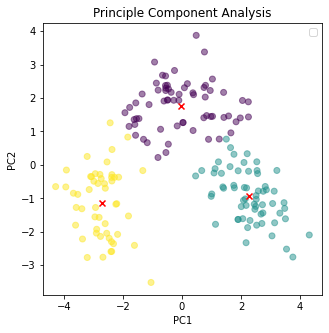

In [93]:
plt.figure(figsize = (5, 5))
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans_model,alpha=0.5)
plt.scatter(centroid_pca[:,0], centroid_pca[:,1], marker='x', c='red')
plt.legend()
plt.title('Principle Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Extra - Classifying random data

####  (c)

처음 K-means 를 통해서 분석하였을 때 정상적으로 군집이 구분되지 않았다. K-means 모델은 적절하지 않다고 판단된다.

K-means은 데이터가 하나의 군집에만 속할 수 있다. 반면 GMM의 경우는 한 데이터는 보통 여러 집단에 확률적으로 소속된다.

GMM은 혼합 가우시안 분포 (Gaussian Mixture)에서 개별 유형의 가우시안 분포 K개를 추출한 후, 각 데이터가 어느 분포에 속하는지를 추정함으로써 클러스터링이 이루어진다.

GMM은 계산량이 많고 가우시안 분포 가정에 맞지 않은 데이터라면 좋은 결과를 기대할 수 없다는 단점이 있지만, K-Means 대비 보다 유연하게 다양한 데이터셋에 적용될 수 있다는 점에서 이점을 갖는다.
 
특히 GMM은 elliptical shape dataset에 좋은 기능을 보이기 때문에 GMM을 모델로 선정하여 다시 Clustering을 진행하였다.

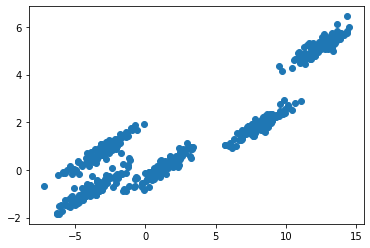

In [94]:
from sklearn.datasets import make_blobs

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers=5)
random_generator = np.random.RandomState(70)

# transform the data to be stretched
transform = random_generator.normal(size=(2,2))
X = np.dot(X, transform)

# plot
plt.scatter(X[:,0], X[:,1])
plt.show()

Text(0.5, 1.0, 'Clustered Data using k-means clustering')

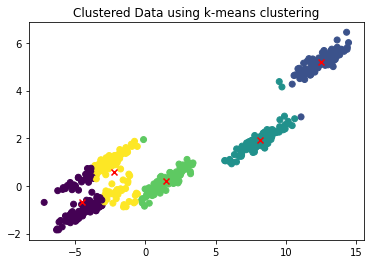

In [95]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', c='red')
plt.title('Clustered Data using k-means clustering')

Text(0.5, 1.0, 'GaussianMixture clustering')

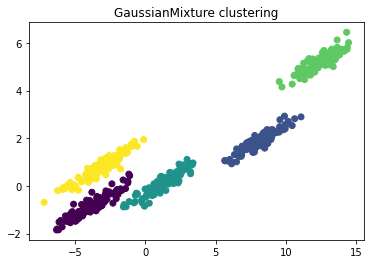

In [96]:
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=5, random_state=42)
y_pred = gmm.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('GaussianMixture clustering')